# **Module 1: Introduction to Spatial Data Analysis in Python**

### **Exercises**

#### Data

For today's workshop, the data has been downloaded, cleaned, transformed, and saved to the directory `./data-module-1/`.
-  `ea_geo.csv` - Malawi Living Standard Measurement Survey Integrated Household Sample (LSMS-IHS) point data are available from https://microdata.worldbank.org/index.php/catalog/3818  
- `mwi_lsms.shp` - Malawi subnational divisions can be downloaded from https://data.humdata.org/dataset/malawi-administrative-level-0-3-boundaries
- `MWI_msk_alt.vrt` - Malawi Digital Elevation Model (DEM) is derived from NASA's Shuttle Radar Topography Mission data product. 

In [1]:
# general use packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.colors import from_levels_and_colors

# geospatial packages
import geopandas as gpd
import rasterio
from rasterio.plot import plotting_extent

**Question 1. Read and display the head of the `ea_geo.csv` file stored under `./data-module-1/`.**

In [2]:
ea_geo_df = pd.read_csv("./data-module-1/ea_geo.csv")
ea_geo_df.head()

ea_id  dist_road  dist_agmrkt  dist_auction  dist_admarc  dist_border  \
0  31221753        0.0     2.000000     85.400002          5.2    73.199997   
1  20206274        0.5    24.600000     90.099998         25.4   138.300003   
2  30402559        4.1    19.500000     12.600000          0.8    46.299999   
3  30307545       11.1    24.200001     40.200001          8.9    71.800003   
4  20109245        3.9    31.900000     10.600000         15.8    72.099998   

   dist_popcenter  dist_boma  ea_lat_mod  ea_lon_mod  
0        2.000000  27.452990   -15.04970   35.201012  
1       24.600000  24.605686   -13.14887   34.332199  
2       19.500000   7.045508   -15.80554   35.175152  
3       24.200001  24.164854   -15.44684   35.094959  
4       31.900000  31.929317   -13.32135   33.509220

**Question 2. Which columns store the geographic coordinates? Transform `DataFrame` into `GeoDataFrame` by using these columns. Display the head of the `GeoDataFrame`.**

In [3]:
ea_geo_gdf = gpd.GeoDataFrame(ea_geo_df,
                              geometry=gpd.points_from_xy(ea_geo_df.ea_lon_mod, ea_geo_df.ea_lat_mod),
                             crs="epsg:4326")
ea_geo_gdf.head()

ea_id  dist_road  dist_agmrkt  dist_auction  dist_admarc  dist_border  \
0  31221753        0.0     2.000000     85.400002          5.2    73.199997   
1  20206274        0.5    24.600000     90.099998         25.4   138.300003   
2  30402559        4.1    19.500000     12.600000          0.8    46.299999   
3  30307545       11.1    24.200001     40.200001          8.9    71.800003   
4  20109245        3.9    31.900000     10.600000         15.8    72.099998   

   dist_popcenter  dist_boma  ea_lat_mod  ea_lon_mod  \
0        2.000000  27.452990   -15.04970   35.201012   
1       24.600000  24.605686   -13.14887   34.332199   
2       19.500000   7.045508   -15.80554   35.175152   
3       24.200001  24.164854   -15.44684   35.094959   
4       31.900000  31.929317   -13.32135   33.509220   

                     geometry  
0  POINT (35.20101 -15.04970)  
1  POINT (34.33220 -13.14887)  
2  POINT (35.17515 -15.80554)  
3  POINT (35.09496 -15.44684)  
4  POINT (33.50922 -13.32135)

**Question 3. Create an interactive map to ensure that the data have been properly geocoded.**

In [4]:
ea_geo_gdf.explore()

**Question 4. Create a static map with 2 subplots: based on columns `dist_road` and `dist_border`. Display values as continuous.**

Text(0.5, 1.0, 'Malawi LSMS distance to border')

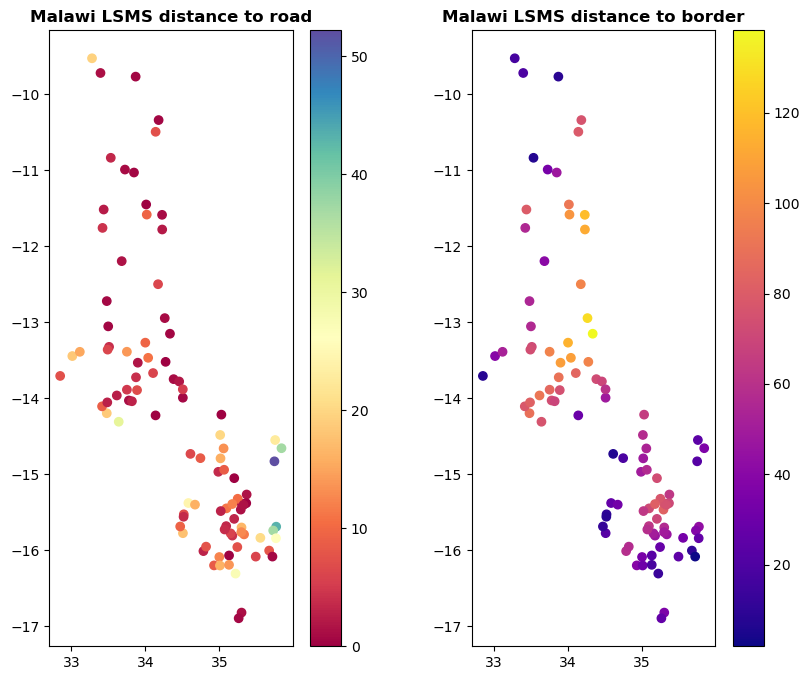

In [5]:
fig, axs = plt.subplots(1,2, figsize=(10,8))

ea_geo_gdf.plot(ax=axs[0], column="dist_road", legend=True, cmap="Spectral")
axs[0].set_title("Malawi LSMS distance to road", weight="bold")

ea_geo_gdf.plot(ax=axs[1], column="dist_border", legend=True, cmap="plasma")
axs[1].set_title("Malawi LSMS distance to border", weight="bold")

**Question 5. Read the `mwi_lsms.shp` shapefile located in the `./data-module-1/` folder. Display the first 2 records of `GeoDataFrame`.**

In [6]:
mwi_lsms_gdf = gpd.read_file("./data-module-1/mwi_lsms.shp")
mwi_lsms_gdf.head(2)

ADM2_EN   Shp_Lng   Shap_Ar ADM2_PC   ADM1_EN ADM1_PC ADM0_EN ADM0_PC  \
0    Balaka  2.036817  0.179379   MW312  Southern     MW3  Malawi      MW   
1  Blantyre  2.677448  0.150847   MW305  Southern     MW3  Malawi      MW   

  wave   croplnd       edu    female     income   livstck   mktOrnI   mktOrnO  \
0    V  0.207533  1.747295  0.129346  29.024301  0.116892  18.29811  4.118338   
1    V  0.166662  2.065374  0.141596  30.266483  0.140718  22.37420  4.378477   

      poverty   tobccHH                                           geometry  
0  186.607208  0.002999  POLYGON ((35.20154 -14.75811, 35.20882 -14.768...  
1  266.750719  0.000000  MULTIPOLYGON (((35.11249 -15.85563, 35.11345 -...

**Question 6. Explore the characteristics of the `GeoDataFrame`.**  
- How many columns does it have?
- How many rows does it have?
- Calculate summary statistics of the numerical fields.

In [7]:
print ("Number of columns:", len(mwi_lsms_gdf.columns))
print ("Number of rows:", len(mwi_lsms_gdf))
print ("Summarize numerical fields")
mwi_lsms_gdf.describe()

Number of columns: 19
Number of rows: 32
Summarize numerical fields


Shp_Lng    Shap_Ar    croplnd        edu     female     income  \
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    2.987243   0.250050   0.213666   1.909522   0.102768  26.002233   
std     1.690557   0.200226   0.108886   0.552413   0.043938   5.957567   
min     0.295003   0.001683   0.031450   1.020701   0.019956  11.309476   
25%     1.901254   0.132559   0.140484   1.567595   0.071184  23.800034   
50%     2.992252   0.217683   0.207279   1.806665   0.098837  26.026428   
75%     3.555009   0.347107   0.263071   2.068218   0.137679  29.723694   
max     7.568139   0.869944   0.516313   3.639913   0.188144  37.116942   

         livstck    mktOrnI    mktOrnO     poverty    tobccHH  
count  32.000000  32.000000  32.000000   32.000000  32.000000  
mean    0.224772  23.036471   7.152466  225.925469   0.014232  
std     0.131902   7.936703   3.606964   69.557724   0.021533  
min     0.026401   4.706737   1.020073  157.718940   0.000000  
25%     0.142251  21.900547   4.924792  179.858437   0.000724  
50%     0.207688  23.889792   6.665634  213.894646   0.003077  
75%     0.258574  26.530467   9.468490  239.651023   0.018629  
max     0.631288  45.717578  17.730257  484.922556   0.066145

**Question 7. Create an interactive map of the `GeoDataFrame`.**

In [9]:
mwi_lsms_gdf.explore()

**Question 8. Create a static map with 2 subplots: based on columns `croplnd` and `poverty`. Display values as continuous.**

Text(0.5, 1.0, 'Malawi LSMS poverty')

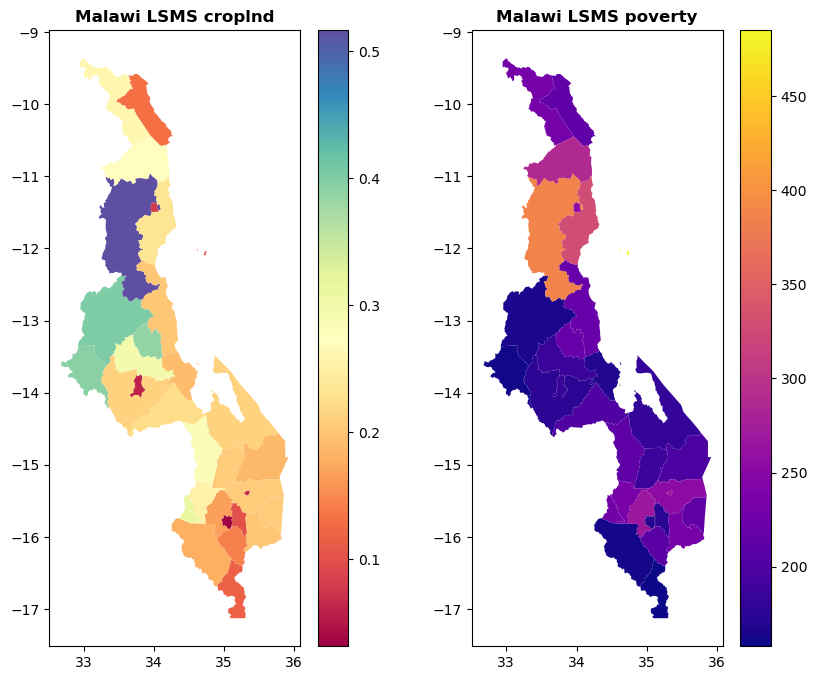

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,8))

mwi_lsms_gdf.plot(ax=axs[0], column="croplnd", legend=True, cmap="Spectral")
axs[0].set_title("Malawi LSMS croplnd", weight="bold")

mwi_lsms_gdf.plot(ax=axs[1], column="poverty", legend=True, cmap="plasma")
axs[1].set_title("Malawi LSMS poverty", weight="bold")

**Question 9. Read the Malawi DEM raster file stored as `MWI_msk_alt.vrt`. Convert the data type to float and reset `NoData` values to `np.nan`.**

In [11]:
mwi_dem =  rasterio.open("./data-module-1/MWI_msk_alt.vrt")
mwi_dem_array = mwi_dem.read(1)
mwi_dem_array = mwi_dem_array.astype(float)
mwi_dem_array[mwi_dem_array==mwi_dem.nodata] = np.nan

**Question 10. Explore the characteristics of your raster.**
- How many rows and columns does it have?
- What is the spatial extent of the dataset?
- What is the coordinate reference system?
- Plot a histogram to display the distribution of values.

Number of rows is equal to 948
Number of columns is equal to 408
Extent of the dataset: BoundingBox(left=32.6, bottom=-17.199999684, right=35.999999864, top=-9.3)
Coordinate Reference System: GEOGCS["unknown",DATUM["Unknown based on WGS 84 ellipsoid",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


(array([6.8560e+03, 4.3615e+04, 2.4045e+04, 2.5204e+04, 2.9416e+04,
        8.4710e+03, 2.2910e+03, 9.4700e+02, 9.6600e+02, 1.9000e+01]),
 array([  32. ,  303.6,  575.2,  846.8, 1118.4, 1390. , 1661.6, 1933.2,
        2204.8, 2476.4, 2748. ]),
 <BarContainer object of 10 artists>)

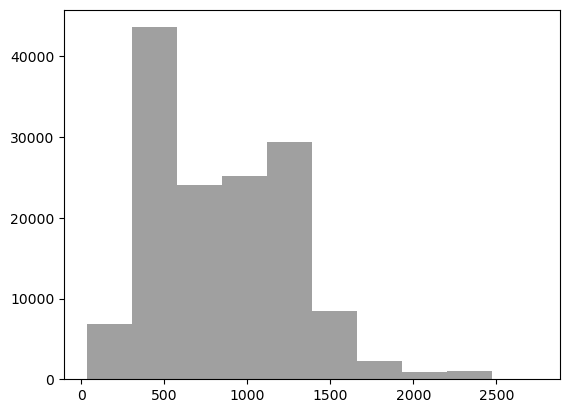

In [12]:
print ("Number of rows is equal to {}".format(mwi_dem.height))
print ("Number of columns is equal to {}".format(mwi_dem.width))
print ("Extent of the dataset: {}".format(mwi_dem.bounds))
print ("Coordinate Reference System: {}".format(mwi_dem.crs))
plt.hist(mwi_dem_array.flatten(), facecolor="grey", alpha=0.75)

**Question 11. Plot Malawi DEM array. Use `terrain` as a `cmap` option.**

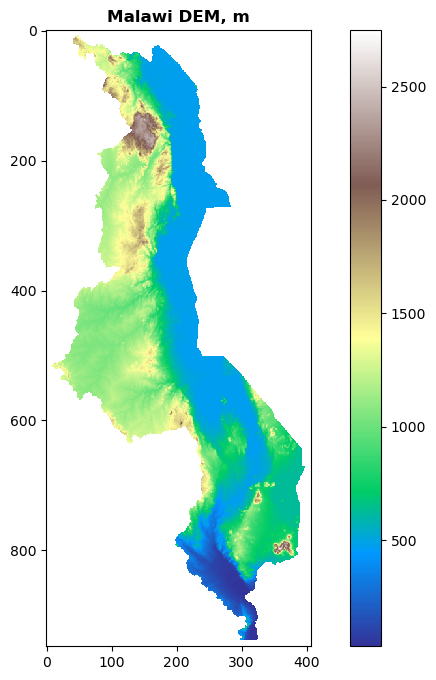

In [14]:
plt.figure(figsize = (10,8))
plt.imshow(mwi_dem_array, interpolation="none", cmap="terrain")
plt.title("Malawi DEM, m", weight="bold")
plt.colorbar()

**Question 12. Display multiple features on the same map:**
- add Malawi DEM (use the coorditate system from this dataset as a reference for others), use `terrain` as `cmap` option;
- add Malawi district boundaries (polygon), display only the edges with `grey` color;
- add Malawi LSMS points, display `dist_agmrkt` column, include the legend.

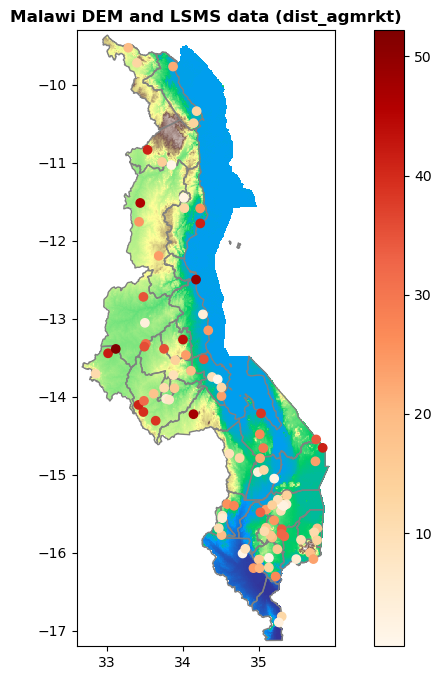

In [18]:
fig, ax = plt.subplots(figsize = (10,8))

plot_extent = plotting_extent(mwi_dem_array, mwi_dem.transform)
ax.imshow(mwi_dem_array, interpolation="none", cmap="terrain", extent=plot_extent)

mwi_lsms_gdf.to_crs(mwi_dem.crs).plot(ax=ax, facecolor="none", edgecolor="grey")

ea_geo_gdf.to_crs(mwi_dem.crs).plot(ax=ax, column="dist_agmrkt", cmap="OrRd", legend=True)

plt.title("Malawi DEM and LSMS data (dist_agmrkt)", weight="bold")
plt.show()